**In notebook settings do not select Omit code cell output when saving this notebook **


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In this assignement you will build a decision tree and a random forest classifier to classify x ray images of potential covid 19 patients. For Test and training data refer to canvas.

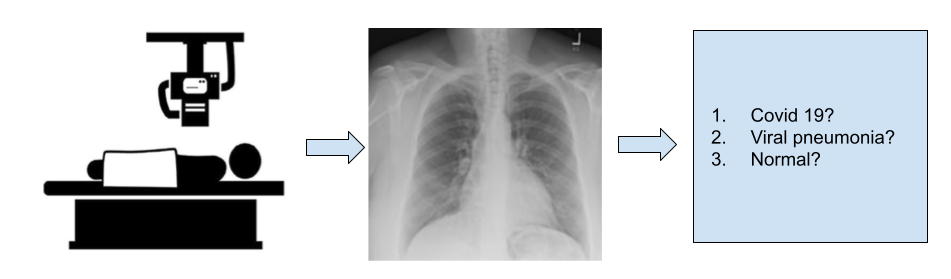

Step 01 : import any libraries you want here. Some common ones are already imported.

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

Step 02 : upload the data from canvas to the top level folder of your google drive. write code to load the data from the google drive.

In [3]:
root_path = '/content/drive/MyDrive/Covid19-dataset' # do not change the root path.

## TODO: load data and generate corresponding labels

def load_data(root_path):
    images = []
    labels = []
    for label in os.listdir(root_path):
        label_path = os.path.join(root_path, label)
        if os.path.isdir(label_path):
            for image_name in os.listdir(label_path):
                image_path = os.path.join(label_path, image_name)
                image = Image.open(image_path)
                # Ensure the image is in RGB mode
                if image.mode != 'RGB':
                    image = image.convert('RGB')
                # Resize the image to a fixed size (e.g., 256x256 pixels)
                image = image.resize((256, 256))
                images.append(np.array(image))
                labels.append(label)
    return np.array(images), np.array(labels)

# Load training and test data
train_data, train_labels = load_data(os.path.join(root_path, 'train'))
test_data, test_labels = load_data(os.path.join(root_path, 'test'))

# Convert labels to numerical values
encoder = LabelEncoder()
train_labels = encoder.fit_transform(train_labels)
test_labels = encoder.transform(test_labels)

Step 03: visualize one x-ray image from each type : "covid 19", "viral pneumonia", "normal"

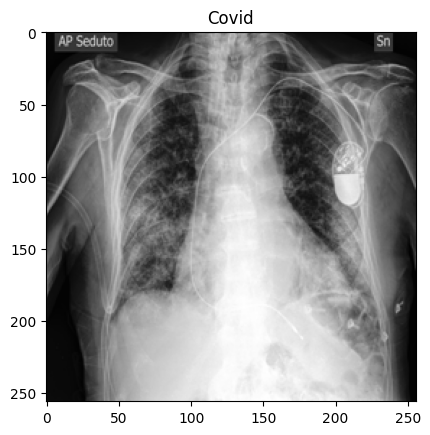

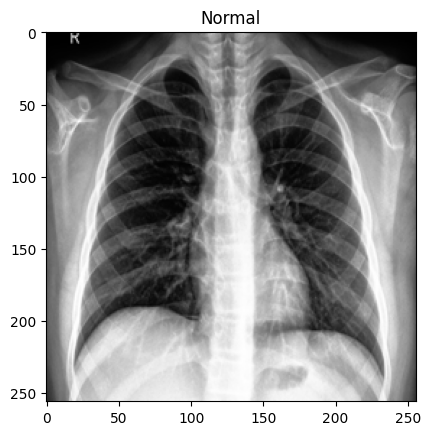

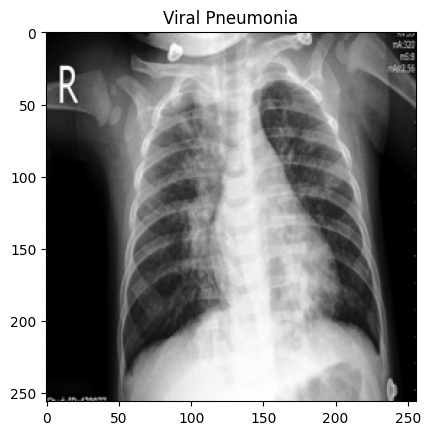

In [4]:
## TODO

def visualize_images(data, labels, encoder):
    for label in encoder.classes_:
        label_index = encoder.transform([label])[0]
        label_data = data[labels == label_index]
        plt.imshow(label_data[0], cmap='gray')
        plt.title(label)
        plt.show()

visualize_images(train_data, train_labels, encoder)

Step 04 : Find the best decision tree to classifiy the x-ray images. Remember to set the random seed for reproducibiity. Find the best critirion and the max_depth using 5 fold cross validation.  

In [5]:
## TODO

# Flatten the images for model training
train_data_flat = train_data.reshape(train_data.shape[0], -1)
test_data_flat = test_data.reshape(test_data.shape[0], -1)

# Set up the decision tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 10)
}

# Perform grid search
grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(train_data_flat, train_labels)

# Print the best parameters
print("Best parameters for Decision Tree:", grid_search.best_params_)



Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5}


Step 05 : Draw the confution matrix. Starter code is given below.

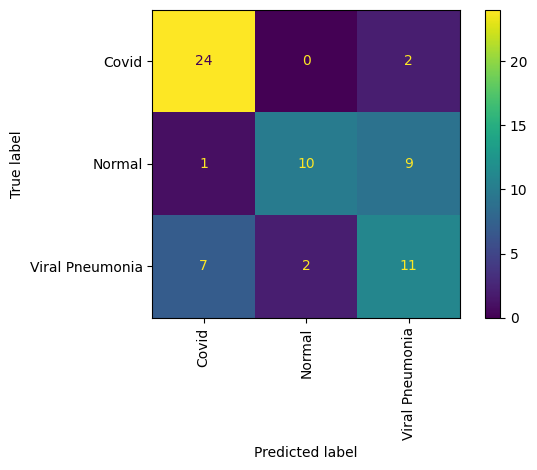

In [7]:
# Flatten the test images for prediction
test_data_flat = test_data.reshape(test_data.shape[0], -1)

# Predict using the best decision tree
best_dt_clf = grid_search.best_estimator_
predictions = best_dt_clf.predict(test_data_flat)

# Draw the confusion matrix
ConfusionMatrixDisplay.from_estimator(
    best_dt_clf, test_data_flat, test_labels, display_labels=encoder.classes_, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()


Step 06 : Find a random forest classifier to classifiy the x-ray images. Remember to set the random seed for reproducibiity. Find the best critirion and the number of trees needed using 5 fold cross validation.

In [9]:
# Flatten the train images for model training
train_data_flat = train_data.reshape(train_data.shape[0], -1)

# Set up the random forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Define the parameter grid for random forest
param_grid_rf = {
    'n_estimators': range(10, 100, 10),
    'criterion': ['gini', 'entropy']
}

# Perform grid search
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(train_data_flat, train_labels)

# Print the best parameters
print("Best parameters for Random Forest:", grid_search_rf.best_params_)


Best parameters for Random Forest: {'criterion': 'gini', 'n_estimators': 40}


Step 07 : Draw the confution matrix. Starter code is given below.

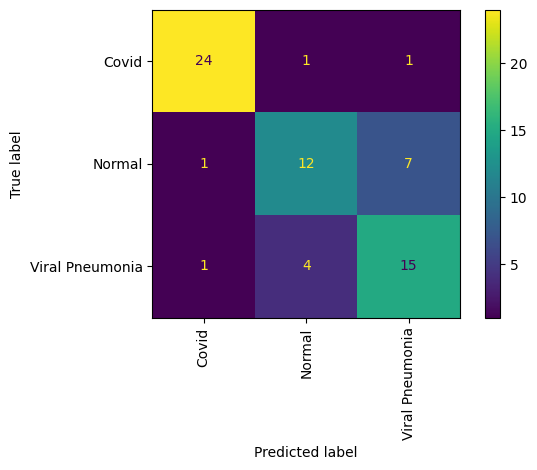

In [11]:
# Flatten the test images for prediction
test_data_flat = test_data.reshape(test_data.shape[0], -1)

# Predict using the best random forest
best_rf_clf = grid_search_rf.best_estimator_
predictions_rf = best_rf_clf.predict(test_data_flat)

# Draw the confusion matrix
ConfusionMatrixDisplay.from_estimator(
    best_rf_clf, test_data_flat, test_labels, display_labels=encoder.classes_, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()